# ANALYSING DATA

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Reading CSV
df = pd.read_csv ('./data/attacks_cleaned.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species,Month,Decade
0,2018.0,Boat,United States,Other,F,57.0,0.0,White shark,June,2010 - 2020
1,2018.0,Unprovoked,United States,Wading,F,11.0,0.0,NaN,June,2010 - 2020
2,2018.0,NaN,United States,Surfing,M,48.0,0.0,NaN,June,2010 - 2020
3,2018.0,Unprovoked,Australia,Surfing,M,NaN,0.0,NaN,June,2010 - 2020
4,2018.0,Provoked,Mexico,Swimming,M,NaN,0.0,Tiger shark,June,2010 - 2020
...,...,...,...,...,...,...,...,...,...,...
6296,NaN,Unprovoked,Australia,Swimming,M,NaN,1.0,NaN,NaN,NaN
6297,NaN,Unprovoked,Australia,Swimming,M,NaN,1.0,NaN,NaN,NaN
6298,NaN,Unprovoked,United States,Swimming,M,NaN,1.0,NaN,NaN,NaN
6299,NaN,Unprovoked,Panama,Other,M,NaN,1.0,NaN,NaN,NaN


## OVERALL FATALITY PER DECADE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1910'),
  Text(1, 0, '1920'),
  Text(2, 0, '1930'),
  Text(3, 0, '1940'),
  Text(4, 0, '1950'),
  Text(5, 0, '1960'),
  Text(6, 0, '1970'),
  Text(7, 0, '1980'),
  Text(8, 0, '1990'),
  Text(9, 0, '2000'),
  Text(10, 0, '2010'),
  Text(11, 0, '2020')])

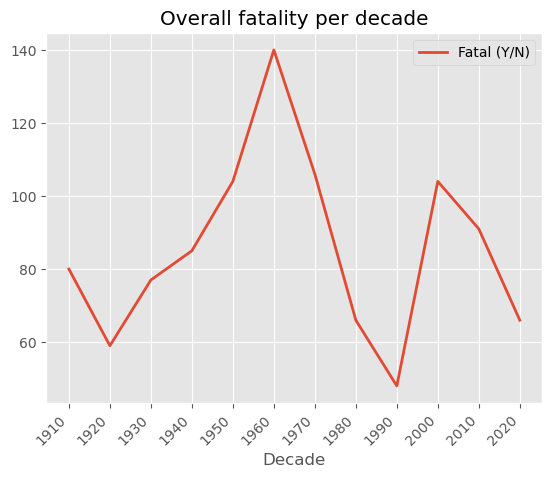

In [4]:
# POSAR TOTES LES X
df.groupby(['Decade']).agg({'Fatal (Y/N)':'sum'}).sort_values(by= 'Decade').plot(title='Overall fatality per decade', linewidth=2.0)
x = ['1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.xticks(rotation=45, ha='right')

## THE ACTIVITY WITH MOST PROVOKED ATTACKS

In [5]:
df['Activity'].value_counts().head()

Swimming    1943
Surfing     1561
Other       1384
Fishing     1106
Wading       307
Name: Activity, dtype: int64

Text(0.5, 1.0, 'The activities with more attacks')

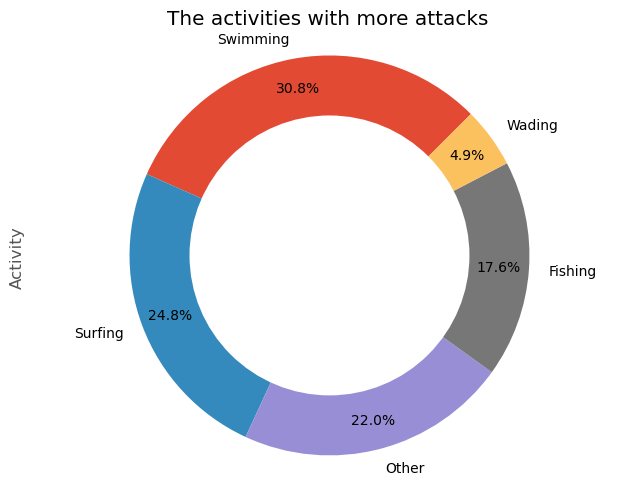

In [6]:
df.Activity.value_counts().head(10).plot(kind="pie", autopct='%1.1f%%', startangle=45, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('The activities with more attacks')

Text(0.5, 1.0, 'The activities with more provoked attacks')

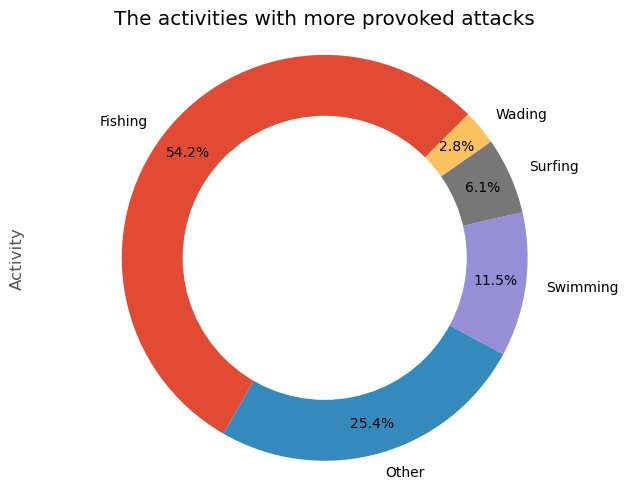

In [7]:
# Tot i ser de les activitats amb menys atacks de taurons, és la que més en provoca amb diferencia
df[(df["Type"] == 'Provoked')].Activity.value_counts().head(10).plot(kind="pie", autopct='%1.1f%%', startangle=45, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('The activities with more provoked attacks')

## THE MOST DANGEROUS MONTHS TO SURF IN USA AND AUSTRALIA

Text(0.5, 1.0, 'The most dangerous months to surf in USA')

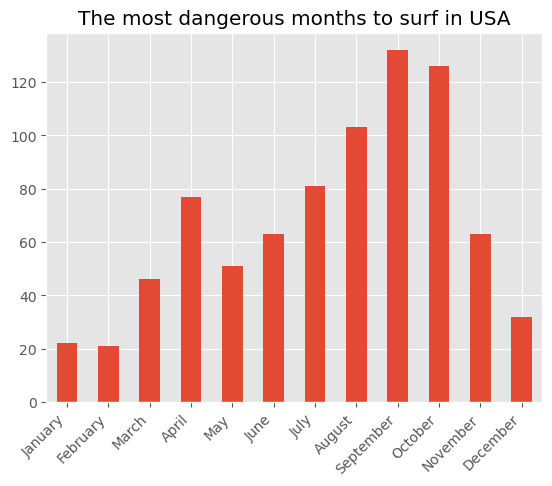

In [8]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df[(df["Country"] == 'United States') & (df["Activity"]=="Surfing")].Month.value_counts().loc[months].plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.title("The most dangerous months to surf in USA")

Text(0.5, 1.0, 'The most dangerous months to surf in Australia')

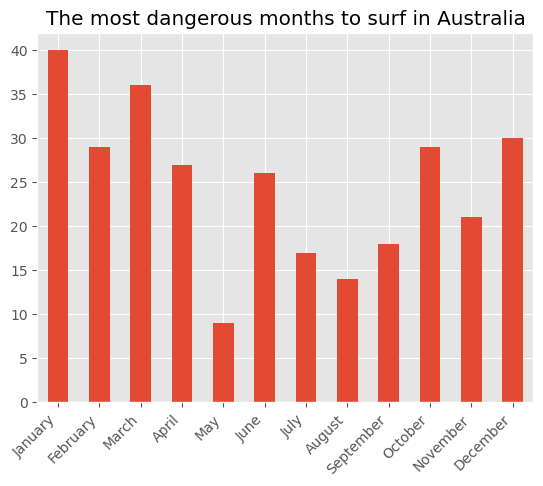

In [9]:
df[(df["Country"] == 'Australia') & (df["Activity"]=="Surfing")].Month.value_counts().loc[months].plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.title("The most dangerous months to surf in Australia")

## ATTACKS BY AGE AND SHARK SPECIES

<AxesSubplot:xlabel='Age'>

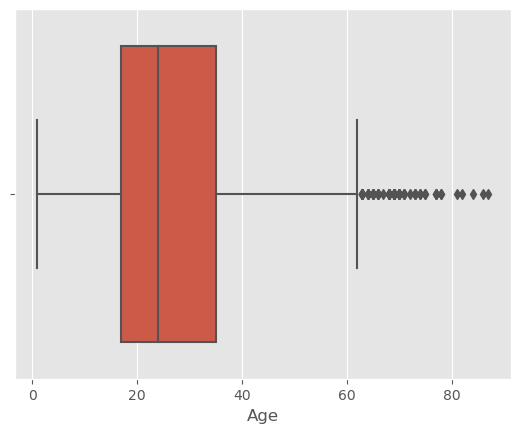

In [10]:
sns.boxplot(x="Age", data=df)

<AxesSubplot:xlabel='Age', ylabel='Species'>

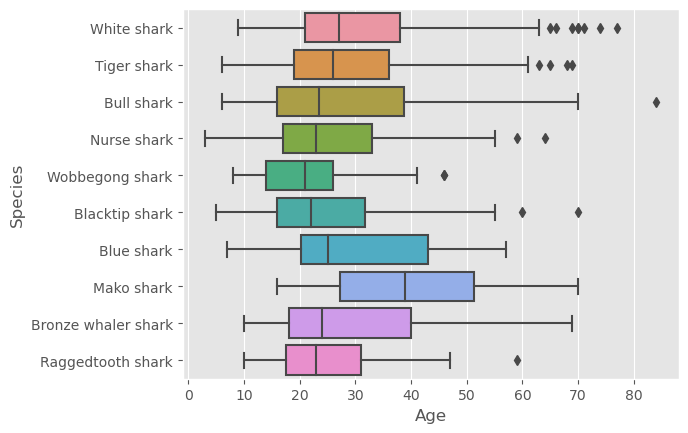

In [11]:
sns.boxplot(x="Age", y="Species", data=df)